#### Import necessary libraries

In [11]:
import pandas as pd
import os

#### Merging 12 months of sales data into a single file

In [18]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

##reading all the files 
files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)


#### Read in Updated dataframe

In [21]:
all_data = pd.read_csv("all_data.csv")


SyntaxError: invalid syntax (2737627970.py, line 5)

#### Clean up data!

In [23]:
##drop rows of NaN
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

In [30]:
##find Order date that is starting with OR
all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']

In [31]:
##add month column
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')

In [39]:
##add sales value column
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Q1. What was the best month for sales? How much was earned that month?


In [42]:

results = all_data.groupby('Month').sum()

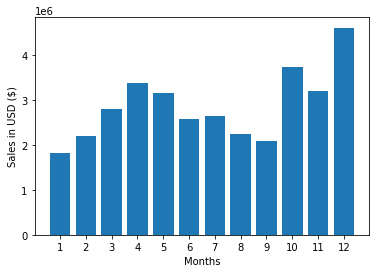

In [43]:
##plot the sales
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()

#### Q2. What US city had the highest number of sales?

In [64]:
#using the .apply()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

results = all_data.groupby('City').sum()
results


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


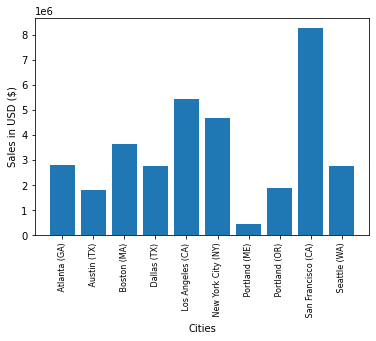

In [89]:
##plot the city sales
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]


plt.bar(cities,results["Sales"])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()